In [8]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(tidymodels)
options(repr.matrix.max.rows = 6)

<h2>Introduction</h2> 

<h4>Background Information</h4>  

We are interested in what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how these  
features differ between various player types. Specifically, we are interested in if **a player's total playtime and age can predict if that player is  
subscribed to a game-related newsletter or not**. In order to carry out our analysis, we must load the data in and make changes to the data so that it  
is formatted appropriately. This also allows us to properly visualize the data which helps us navigate through our analysis as well as convey information.  
With the properly formatted data and the information provided by the visualizations, we can perform the data analysis. More specifically, we  
will be able to create an algorithm that tries to categorize if a player is subscribed to a game-related newsletter based on total playtime and age.  
This algorithm can be trained and tested and its accuracy will help us come to a conclusion. Additional visualizations will help convey the reasoning  
behind our conclusion.

<h4>Data Description</h4>

Datasets provided for the analysis are **sessions.csv** and **players.csv**

Dataset **sessions.csv** contains data for unique play sessions including the session start and end times and a string unique to each player.  
The columns in this data set are:
1. **hashedEmail**: string variable unique for the player
2. **start_time**: character variable indicating date and time of start of session
3. **end_time**: character variable indicating date and time of end of session
4. **original_start_time**: numeric variable indicating start time of session in unknown format
5. **original_end_time**: numeric variable indicating end time of session in unknown format

Dataset **players.csv** contains data for each unique player including personal and game-related information.  
The columns in this data set are:
1. **experience**: categorical variable stating the experience level of the player
2. **subscribe**: boolean variable stating if the player is subscribed to a game-related newsletter
3. **hashedEmail**: string variable unique for the player
4. **played_hours**: numeric variable stating total hours played for the player
5. **name**: string variable stating the name of the player
6. **gender**: string variable stating the gender of the player
7. **Age**: numeric variable stating the age of the player

It should be noted that dataset **sessions.csv** is unnecessary for our analysis, so will not be referred to here on out.

<h2>Methods & Results</h2>

<h4>Data Wrangling</h4>

As stated in the introduction, the data needs to be formatted appropriately. This process is referred to as wrangling  
and is carried out here:

In [9]:
players <- read_csv("https://raw.githubusercontent.com/Kqvii/DSCI100-Group13/refs/heads/main/data/players.csv") |>
    mutate(subscribe = as_factor(subscribe)) |> # Turning TRUE and FALSE into two unique categories
    filter(!is.na(Age), !is.na(played_hours), !is.na(subscribe)) # Removes lines of data which contain NA values as they will interfere with the analysis
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


In [10]:
players_wrangled <- players |> 
    select(subscribe, played_hours, Age) # Isolating the columns required for our analysis

<h4>Exploratory Visualization</h4>

In order to better understand the data we are working with, we will create a visualization using the wrangled data here:

subscribe,subscribed,average_hours_played
<fct>,<int>,<dbl>
FALSE,52,0.5019231
TRUE,142,7.8830986


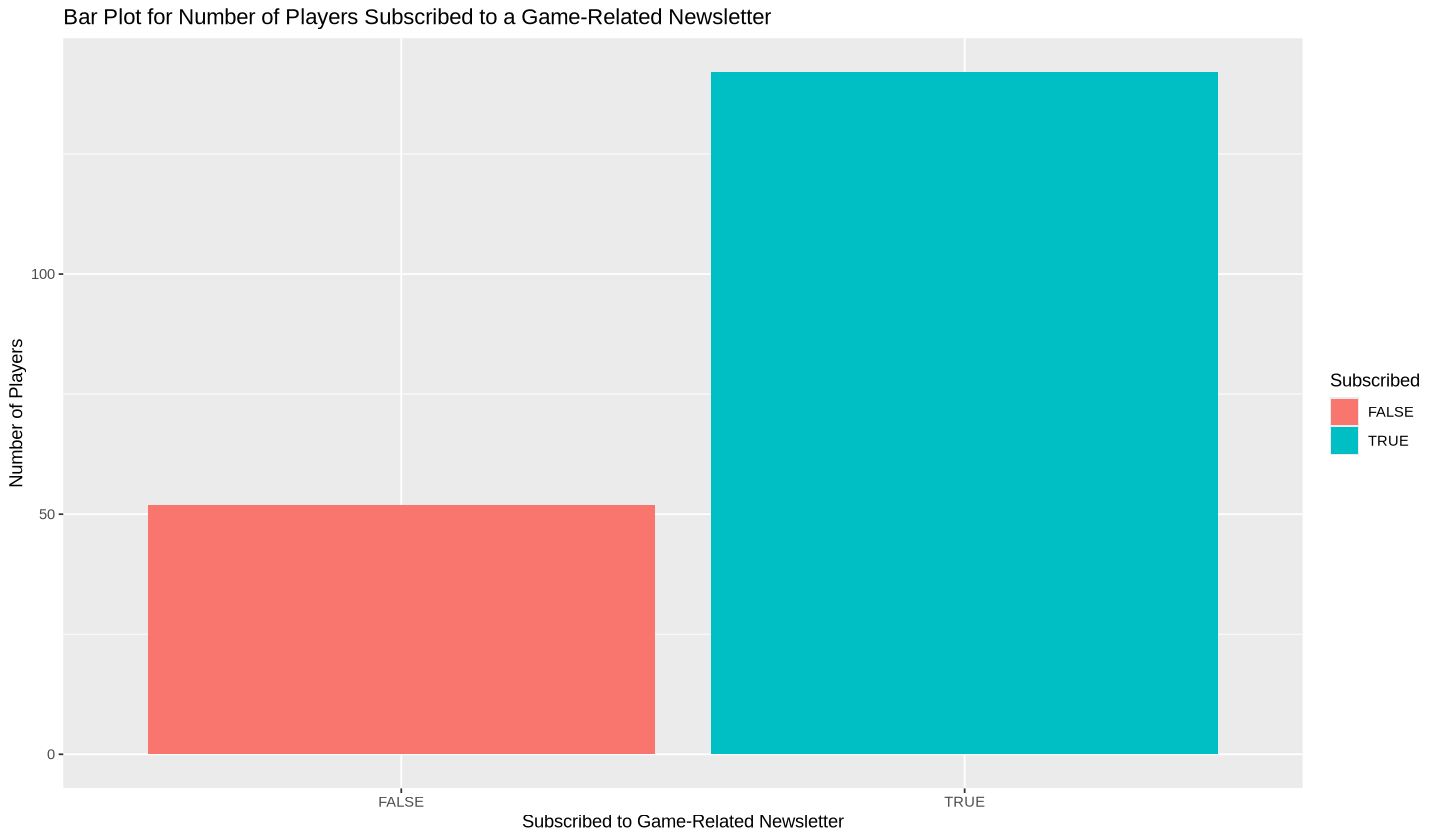

In [25]:
subscribed_viz_data <- players_wrangled |>
    group_by(subscribe) |> # Grouping observations by subscripton status
    summarize(subscribed = n(), # Counts number of observations based on subscription status
              average_hours_played = mean(played_hours)) # Determines average total playtime based on subscription status
subscribed_viz_data

subscribed_viz <- subscribed_viz_data |>
    ggplot(aes(x = subscribe, y = subscribed, fill = subscribe)) +
        geom_bar(stat='identity') +
        labs(x = "Subscribed to Game-Related Newsletter",
             y = "Number of Players",
             title = "Bar Plot for Number of Players Subscribed to a Game-Related Newsletter",
             fill = "Subscribed")
subscribed_viz

We see that in the entire dataset, there is a much greater proportion of players who are subscribed to  
a game-related newsletter rather than not. As well, we see that the average total playtime for those  
subscribed appears to be higher. This means that a relationship between total playtime and subscription  
status may exist and is worth analyzing.

Warning message:
“Removed 10 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


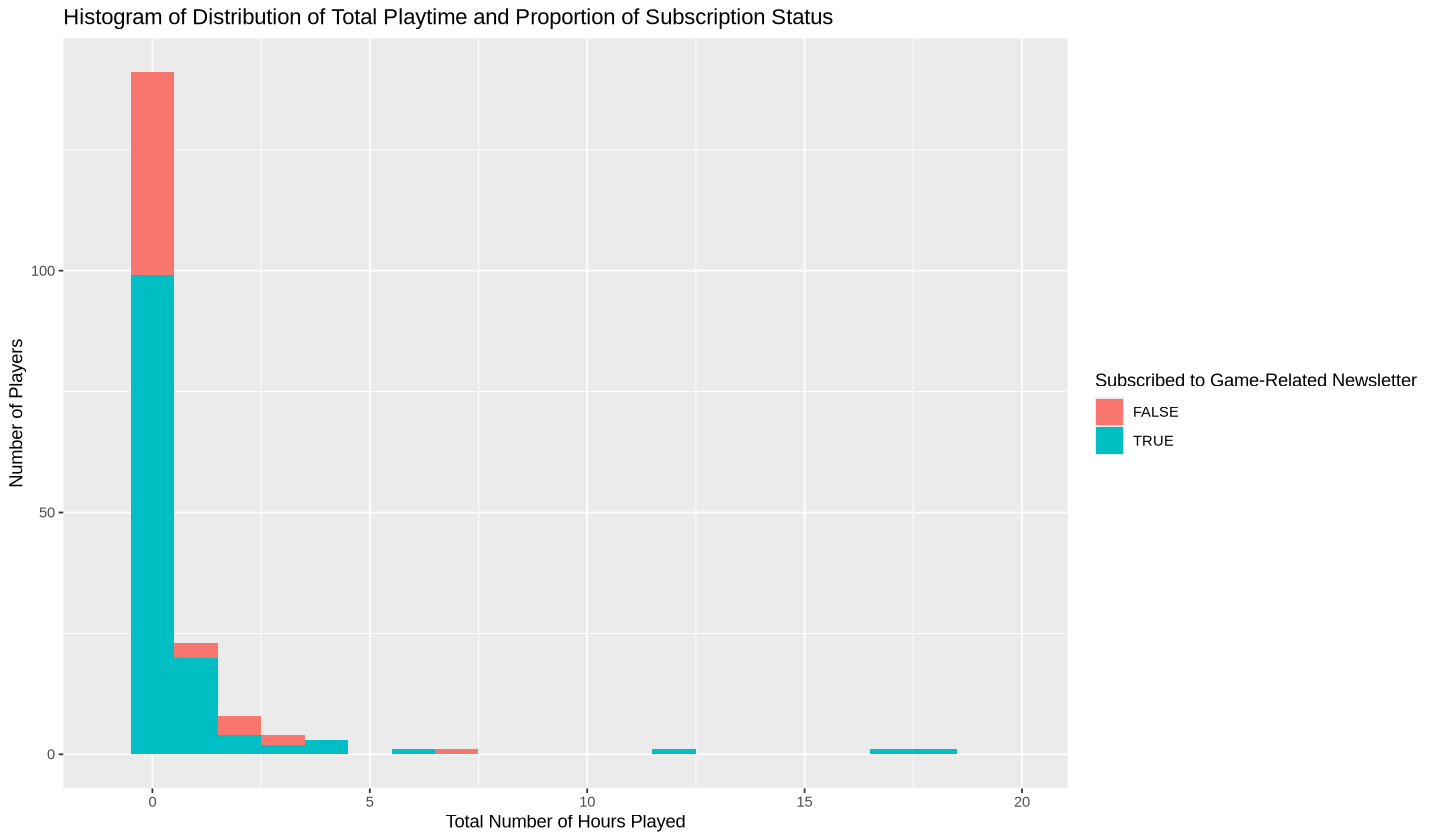

In [26]:
players_dist <- players_wrangled |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 1) +
    scale_x_continuous(limits = c(-1, 20)) +
    labs(x = "Total Number of Hours Played", 
         y = "Number of Players",
         title = "Histogram of Distribution of Total Playtime and Proportion of Subscription Status",
         fill = "Subscribed to Game-Related Newsletter")

players_dist

Here we can better visualize the proportion of subscription status based on the distribution of total playtime.  
It does appear that for longer total playtimes, the player may be more likely to subscribe.

subscribe,Age
<fct>,<dbl>
TRUE,9
TRUE,17
FALSE,17
⋮,⋮
FALSE,22
FALSE,17
FALSE,17


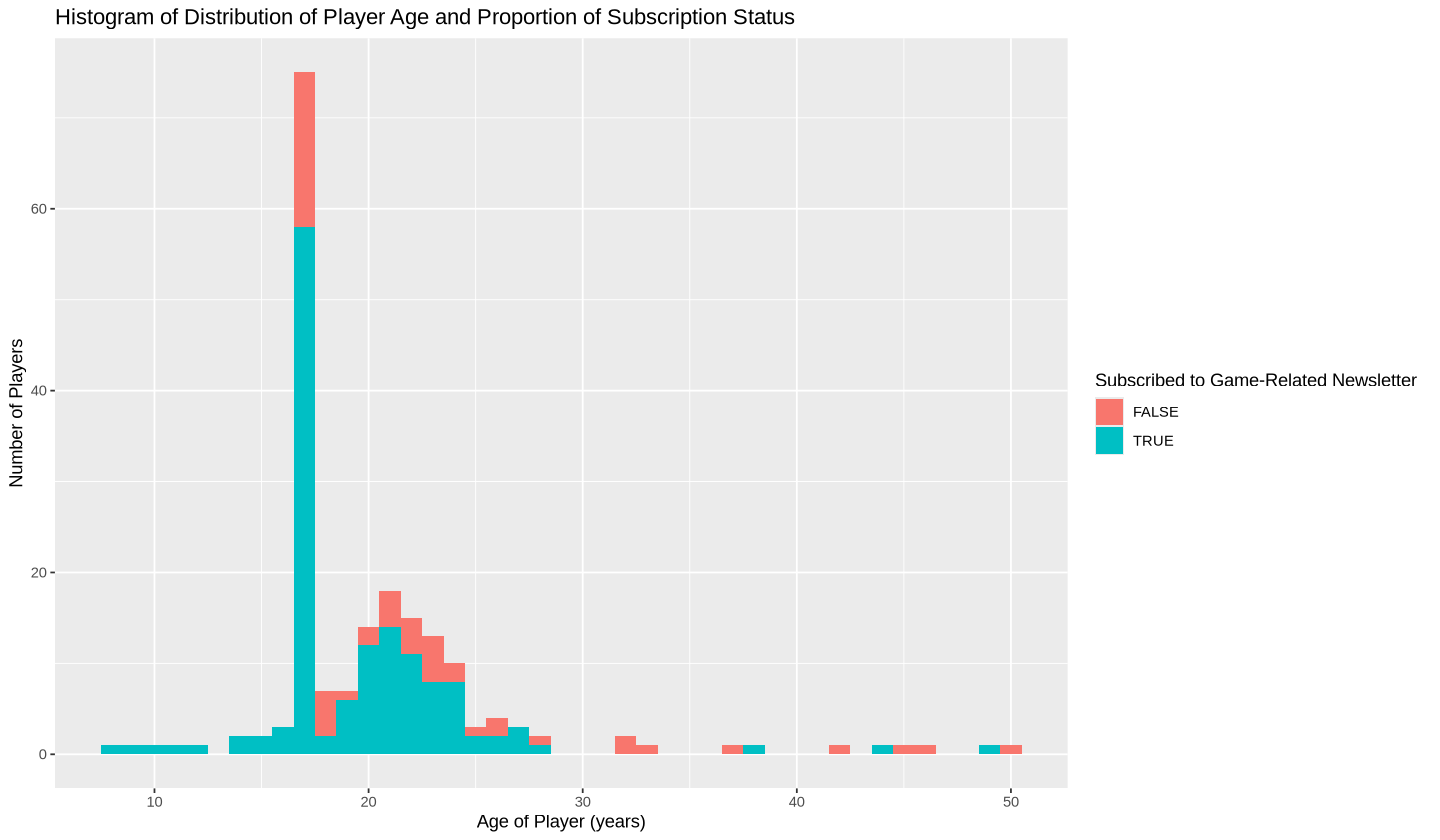

In [18]:
options(repr.plot.width = 12)

age_viz_data <- players_wrangled |>
    select(subscribe, Age)
age_viz_data

age_viz <- age_viz_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
        geom_histogram(binwidth = 1) +
        labs(x = "Age of Player (years)",
             y = "Number of Players",
             title = "Histogram of Distribution of Player Age and Proportion of Subscription Status",
             fill = "Subscribed to Game-Related Newsletter")
age_viz

This visualization shows that there are varying proportions of players subscribed to a game-related newsletter  
based on age. There appears to be a higher proportion of being subscribed for younger ages instead of older  
ages. This means that a relationship between age and subscription status may exist and is worth analyzing as well.

<h4>Data Analysis</h4>

In [5]:
set.seed(1234)

players_split <- initial_split(players_wrangled, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

players_train
players_test

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
FALSE,0.0,21
FALSE,0.0,22
FALSE,0.1,17
⋮,⋮,⋮
TRUE,0,17
TRUE,0,20
TRUE,0,17


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
FALSE,0.0,17
TRUE,0.1,21
⋮,⋮,⋮
TRUE,0.1,17
TRUE,0.1,44
FALSE,2.3,17


In [9]:
subscribe_recipe <- recipe(subscribe ~ played_hours + Age, data = players_wrangled) |>
  step_center(all_predictors()) |>  
  step_scale(all_predictors())

subscribe_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
      set_engine("kknn") |>
      set_mode("classification")

subscribe_fit <- workflow() |>
      add_recipe(subscribe_recipe) |>
      add_model(subscribe_model) |>
      fit(data = players_train)

In [10]:
players_predictions <- predict(subscribe_fit, players_test) |>
    bind_cols(players_test)

players_predictions

players_predictions_metrics <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)

players_predictions_metrics

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,30.3,9
FALSE,FALSE,0.0,17
TRUE,TRUE,0.1,21
⋮,⋮,⋮,⋮
TRUE,TRUE,0.1,17
FALSE,TRUE,0.1,44
TRUE,FALSE,2.3,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5714286
kap,binary,-0.0729927


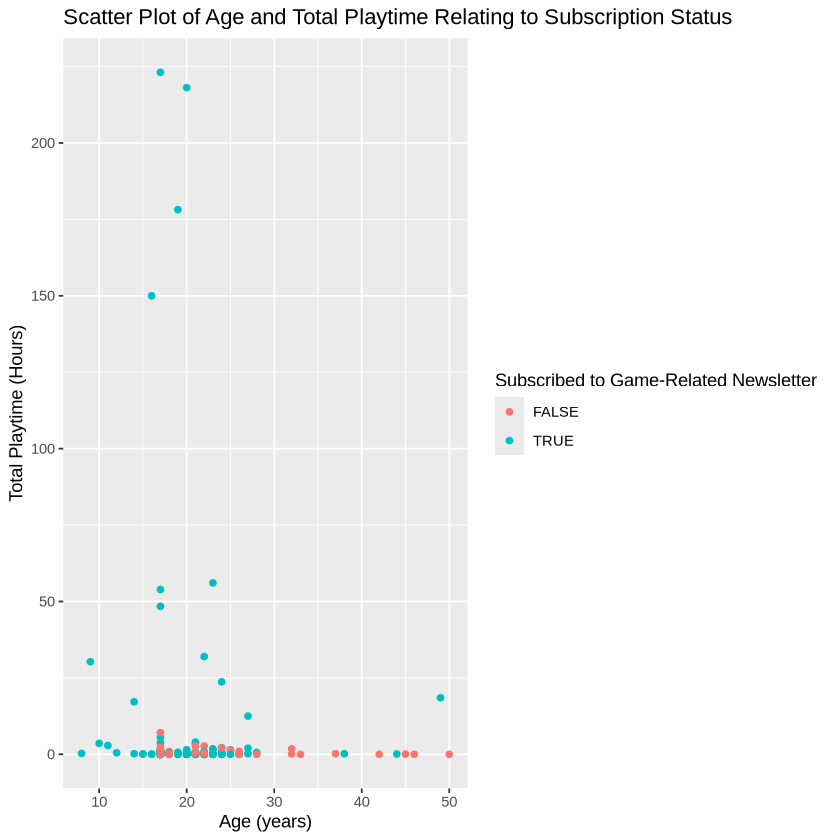

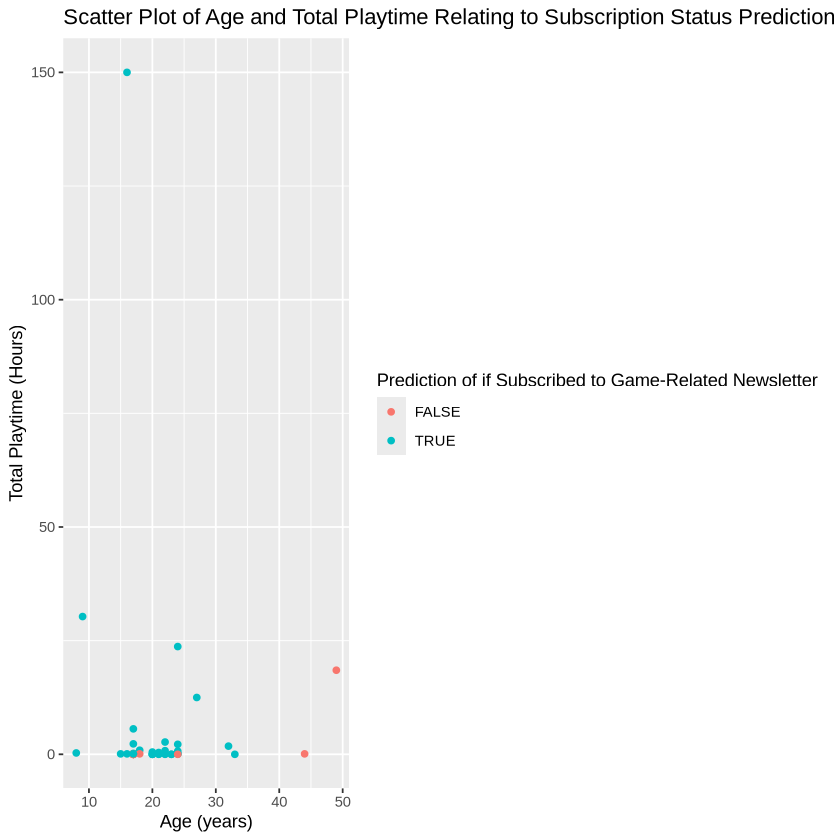

In [12]:

players_plot <- players_wrangled |>
    ggplot(aes(x = Age, y = played_hours)) + 
        geom_point(aes(colour = subscribe)) +
        xlab("Age (years)") + 
        ylab("Total Playtime (Hours)") +
        labs(colour = "Subscribed to Game-Related Newsletter",
             title = "Scatter Plot of Age and Total Playtime Relating to Subscription Status")
players_plot


players_prediction_plot <- players_predictions |>
    ggplot(aes(x = Age, y = played_hours)) + 
        geom_point(aes(colour = .pred_class)) +
        xlab("Age (years)") + 
        ylab("Total Playtime (Hours)") +
        labs(colour = "Prediction of if Subscribed to Game-Related Newsletter",
             title = "Scatter Plot of Age and Total Playtime Relating to Subscription Status Prediction")
players_prediction_plot

In [94]:
average_player <- players_wrangled |>
    summarize(avg_age = median(Age),
              avg_playtime = median(played_hours))
average_player

new_obs <- tibble(played_hours = 0.1,Age =19)
class_prediction <- predict(subscribe_fit, new_obs)
class_prediction

avg_age,avg_playtime
<dbl>,<dbl>
19,0.1


.pred_class
<fct>
TRUE


In [95]:
subscribe_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

players_resample_fit <- workflow() |> 
  add_recipe(subscribe_recipe) |>   
  add_model(subscribe_model) |>       
  fit_resamples(resamples = subscribe_vfold)

players_metrics <- collect_metrics(players_resample_fit)
players_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6210016,5,0.03851559,Preprocessor1_Model1
roc_auc,binary,0.5407583,5,0.05050338,Preprocessor1_Model1


In [70]:
players_tune <- nearest_neighbor(mode = "classification", 
                             neighbors = tune(), 
                             weight_func = "rectangular") |> 
  set_engine("kknn")

players_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [71]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |> 
  add_recipe(subscribe_recipe) |>  # Add preprocessing recipe
  add_model(players_tune) |>       # Add k-NN model with tuning
  tune_grid(resamples = subscribe_vfold, grid = k_vals) |>  # Perform tuning on cross-validation splits
  collect_metrics()  # Aggregate performance metrics
                 
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4889327,5,0.03571939,Preprocessor1_Model01
1,roc_auc,binary,0.5115260,5,0.03785072,Preprocessor1_Model01
2,accuracy,binary,0.4889327,5,0.03571939,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,binary,0.5102505,5,0.025540280,Preprocessor1_Model09
10,accuracy,binary,0.6262233,5,0.036667880,Preprocessor1_Model10
10,roc_auc,binary,0.5127396,5,0.006909878,Preprocessor1_Model10


neighbors,mean
<dbl>,<dbl>
7,0.6409688
8,0.6338424
9,0.6333662
⋮,⋮
3,0.5243842
1,0.4889327
2,0.4889327


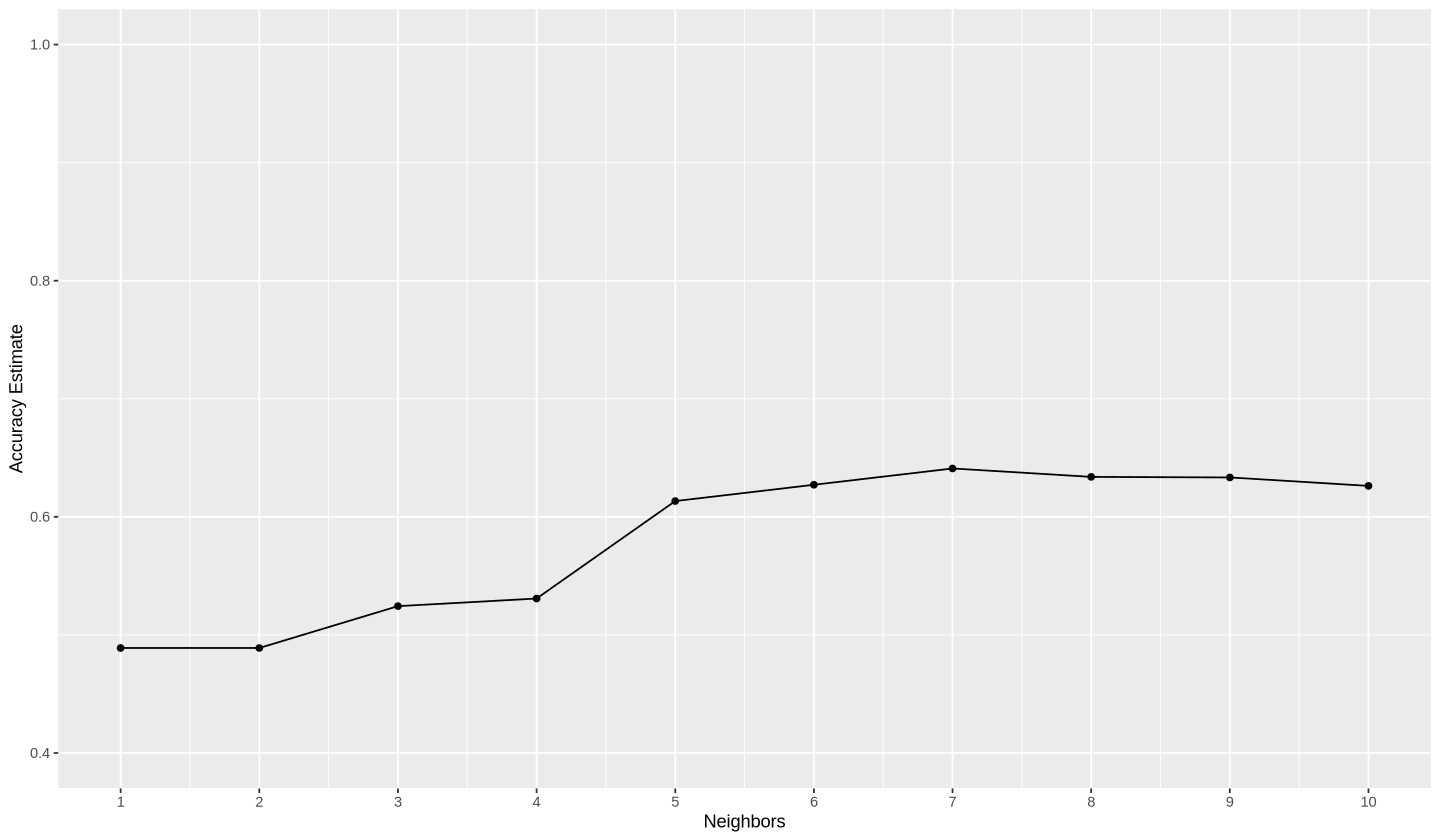

In [72]:
accuracies <- knn_results |> 
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(-mean)
accuracies

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k